In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
sd=pd.read_csv("Salary_Data.csv")
print(sd.shape, "Salary Data Data Shape")
print("="*30)


(30, 2) Salary Data Data Shape


In [3]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## sklearn model

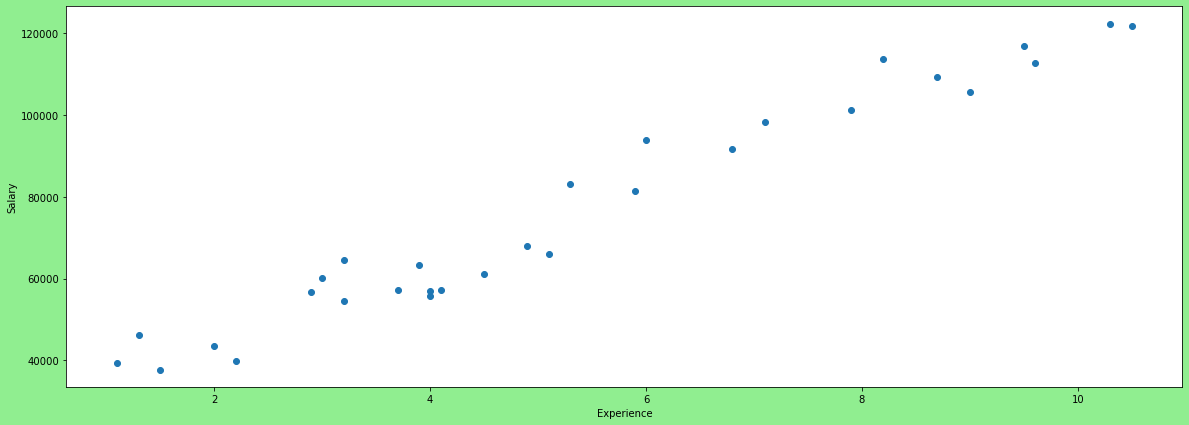

In [4]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(sd.YearsExperience,sd.Salary)

plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [5]:
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:

X=sd["YearsExperience"].values.reshape(-1,1)
Y=sd["Salary"].values.reshape(-1,1)

In [7]:
# Test trainsplit for superwised learning
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(24, 1) (6, 1) (24, 1) (6, 1)


## model selection

In [8]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [9]:
print (lm.coef_)#alpha 
print (lm.intercept_)#beta


[[9351.56909996]]
[26910.26632395]


In [10]:
# Y = 26355.67 + 9215.84X

In [11]:
Y_pred=lm.predict(X_test)

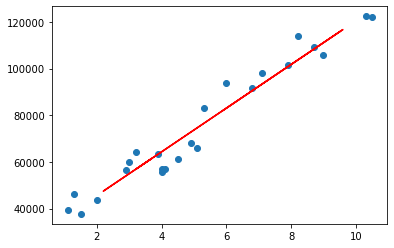

In [12]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,Y_pred,color="red")
plt.show()

In [13]:
# Comparition
df=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df

,Actual,Predicted
0,81363.0,82084.524014
1,112635.0,116685.329684
2,54445.0,56835.287444
3,57189.0,61511.071994
4,39891.0,47483.718344
5,116969.0,115750.172774


<function matplotlib.pyplot.show(close=None, block=None)>

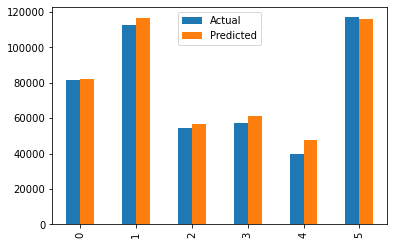

In [14]:
df.plot(kind="bar")
plt.show

In [15]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2_value:',r2_score(Y_test,Y_pred))
print('Mean Squared Eroor:',metrics.mean_squared_error(Y_test,Y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))

r2_value: 0.9805496141249831
Mean Squared Eroor: 16742409.914830642
Mean Absolute Error: 3382.6264508700865


## Stats Model

In [16]:
first_model=smf.ols("Salary~YearsExperience",data=sd).fit()
first_model

In [17]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        23:38:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
second_model=smf.ols("Salary~np.log(YearsExperience)",data=sd).fit()
second_model

In [19]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        23:38:40   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
third_model=smf.ols("np.log(Salary)~YearsExperience",data=sd).fit()
third_model

In [21]:
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        23:38:42   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
f_model=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=sd).fit()
f_model

In [23]:
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           7.40e-16
Time:                        23:38:44   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

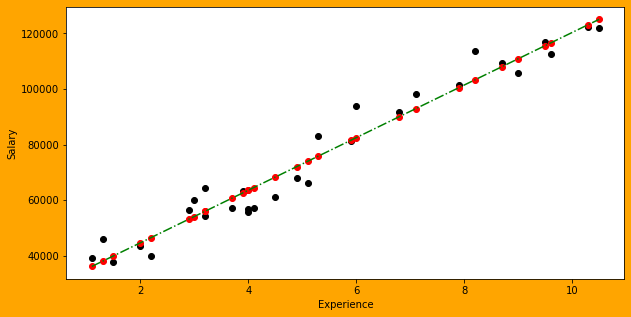

In [24]:
plt.figure(figsize=(10,5),facecolor="orange")
plt.scatter(sd.YearsExperience,sd.Salary,color="black")
plt.plot(sd.YearsExperience,first_model.predict(),linestyle="-.",color="green")
plt.scatter(sd.YearsExperience,first_model.predict(),color="red")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()